<h1>ΕΡΓΑΣΙΑ 2 - ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ</h1>
<h2> ΦΟΥΚΑΝΕΛΗΣ ΧΡΗΣΤΟΣ - ΓΕΡΩΓΙΟΣ | 115201900204</h2>


<strong>Ερώτημα 1 - Logistic regression & Overfitting</strong>

In [136]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x,w):
    return ( 1 / ( 1 + math.exp( -w*x ) ) )

x = np.arange(-10.,10.,0.1)
sigmoid_vec = np.vectorize(sigmoid)

w = 1

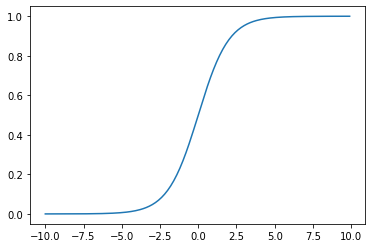

In [137]:
sig1 = sigmoid_vec(x,1)
plt.plot(x,sig1)
plt.show()

w = 5

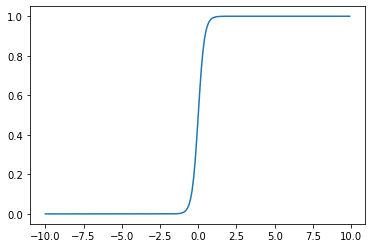

In [138]:
sig5 = sigmoid_vec(x,5)
plt.plot(x,sig5)
plt.show()

w = 100

In [139]:
sig100 = sigmoid_vec(x,100)
plt.plot(x,sig100)
plt.show()

OverflowError: math range error

<strong>Παρατηρήσεις: </strong> <br />

Η λογιστική παλινδρόμηση παρουσιάζει overfitting για μεγάλες τιμές της παραμέτρου w καθώς όσο το w αυξάνεται, αυξάνεται και το όριο με το οποίο το μοντέλο προσεγγίζει τις τιμές 0 και 1. Επιπλέον, $\lim_{w \to \infty} e^{-wx} = \infty$, το οποίο δεν είναι δυνατόν να αναπαρασταθεί. <br />

Η κανονικοποίηση της παραμέτρου w θα οδηγούσε σε μείωση του σφάλματος γενίκευσης (όχι όμως του σφάλματος εκπαίδευσης) με αποτέλεσμα να μειώνεται το overfitting. Μια καλή συνάρτηση κανονικοποίησης είναι η L1 η οποία χρησιμοποιεί ευκλείδιες αποστάσεις αντί για σιαφορά τετραγώνων που χρησιμοποιεί η L2. Μ ετη χρήση της L1 πετυχαίνεται εξάλειψη λιγότερο σημαντικών feautures με αποτέλεσμα να μειώνεται το overfitting.

<strong>Ερώτημα 2 - Ridge Regression</strong>

$ \beta^* = argmin^{}_{\beta}\sum_{i}^{N} (y_{i}-b^{T}x_{i})^2 + \lambda \sum_{k=1}^{K} \beta^{2}_{k} $ <br />

Πρόβλημα ελαχιστοποίησης ευκλείδιων αποστάσεων: $ \beta^* = argmin^{}_{\beta}\|y-X\beta\|^2 + \lambda\|\beta\|^{2}_{2}, X \in R^{N x M} $  <br />

Με βάση τις διαφάνειες του μαθήματος έχουμε το least squares minimization:  <br />
$\hat{\omega} = argmin_{\omega}\|y - \phi\omega\|^{2}_{2}, \nabla^{}_{\omega} l(\omega) = 0$  <br />

Έτσι έχουμε:  <br />
$\nabla^{}_{b_{k}} l(b_{k}) = 0, \forall k \implies (X^{T}X\beta)_{k} - (X^{T}y)_{k} + \lambda\beta_{k} = 0, \forall k \implies X^{T}y = (X^{T}X + \lambda I)\beta$ <br />

Επομένως:
$\beta = (X^{T}X + \lambda I)^{-1}X^Ty$

Για λ > 0, ο παράγοντας λI εξασφαλίζει στο μοντέλο οτι οι ιδιοτιμεές του πίνακα είναι θετικές και επομένως είναι αντιστρέψιμος και η λύση είναι μοναδική

<strong>Ερώτημα 3 - Αναγνώριση Προσώπων (Face Recognition)</strong>

In [140]:
import math
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD

Ι - ΣΥΝΑΡΤΗΣΕΙΣ

In [141]:
# function that isolates the person number form a given image file
def extract_person_number(filename):
    number = filename[6:8]
    return int(number.lstrip('0'))

# function that turn a 50x50 image into a (2500,) 1d vector
def image_vectorization(png_file):
    image = Image.open("faces/"+png_file)
    np_image = np.array(image)        # turn image into pixel array
    length, height = np_image.shape                   
    image_vector = np_image.reshape((length * height))   # (reduce to dimensio (2500,) )
    return image_vector

def loadImages(path,set_number):
    class_list = []
    X = []
    if set_number == "Set_1":
        for png_file in os.listdir(path):
            photo_number = int(png_file[9:11])
            if photo_number >= 1 and photo_number <= 7:
                image_vector = image_vectorization(png_file)
                X.append(image_vector)
                class_list.append(extract_person_number(png_file))
    elif set_number == "Set_2":
        for png_file in os.listdir(path):
            photo_number = int(png_file[9:11])
            if photo_number >= 8 and photo_number <= 19:
                image_vector = image_vectorization(png_file)
                X.append(image_vector)
                class_list.append(extract_person_number(png_file))
    elif set_number == "Set_3":
        for png_file in os.listdir(path):
            photo_number = int(png_file[9:11])
            if photo_number >= 20 and photo_number <= 31:
                image_vector = image_vectorization(png_file)
                X.append(image_vector)
                class_list.append(extract_person_number(png_file))   
    elif set_number == "Set_4":
        for png_file in os.listdir(path):
            photo_number = int(png_file[9:11])
            if photo_number >= 32 and photo_number <= 45:
                image_vector = image_vectorization(png_file)
                X.append(image_vector)
                class_list.append(extract_person_number(png_file))
    else:
        for png_file in os.listdir(path):
            photo_number = int(png_file[9:11])
            if photo_number >= 46 and photo_number <= 64:
                image_vector = image_vectorization(png_file)
                X.append(image_vector)
                class_list.append(extract_person_number(png_file))
    return X,class_list

ΙΙ - ΕΚΠΑΙΔΕΥΣΗ PCA ΚΑΙ CLASSIFICATION ΜΟΝΤΕΛΩΝ / ΠΡΟΒΛΕΨΗ

In [142]:
X_train, y_train = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_1")

X1_test, y1_test = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_1")

X2_test, y2_test = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_2")

X3_test, y3_test = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_3")

X4_test, y4_test = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_4")

X5_test, y5_test = loadImages("C:\\Users\\chris\\Desktop\\machine_learning_2\\faces","Set_5")

In [143]:
# data scaling
std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X1_test_std = std.fit_transform(X1_test)

X2_test_std = std.fit_transform(X2_test)

X3_test_std = std.fit_transform(X3_test)

X4_test_std = std.fit_transform(X4_test)

X5_test_std = std.fit_transform(X5_test)

[d = 9]

In [144]:
d = 9
pca_9 = PCA(n_components=d, whiten=True).fit(X_train_std)

x_train_pca_9 = pca_9.transform(X_train_std)

x1_test_pca_9 = pca_9.transform(X1_test_std)

x2_test_pca_9 = pca_9.transform(X2_test_std)

x3_test_pca_9 = pca_9.transform(X3_test_std)

x4_test_pca_9 = pca_9.transform(X4_test_std)

x5_test_pca_9 = pca_9.transform(X5_test_std)

In [145]:
clf = KNeighborsClassifier()
clf.fit(x_train_pca_9,y_train)

KNeighborsClassifier()

In [146]:
y1_pred_9 = clf.predict(x1_test_pca_9)
y2_pred_9 = clf.predict(x2_test_pca_9)
y3_pred_9 = clf.predict(x3_test_pca_9)
y4_pred_9 = clf.predict(x4_test_pca_9)
y5_pred_9 = clf.predict(x5_test_pca_9)

In [147]:
print("Set_1 results:")
print(classification_report(y1_test, y1_pred_9,zero_division=1))
print("Set_2 results:")
print(classification_report(y2_test, y2_pred_9,zero_division=1))
print("Set_3 results:")
print(classification_report(y3_test, y3_pred_9,zero_division=1))
print("Set_4 results:")
print(classification_report(y4_test, y4_pred_9,zero_division=1))
print("Set_5 results:")
print(classification_report(y5_test, y5_pred_9,zero_division=1))

Set_1 results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Set_2 results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.92      0.96        12
           3       1.00      0.92      0.96     

[d = 30]

In [148]:
d = 30
pca_30 = PCA(n_components=d, whiten=True).fit(X_train_std)

x_train_pca_30 = pca_30.transform(X_train_std)

x1_test_pca_30 = pca_30.transform(X1_test_std)

x2_test_pca_30 = pca_30.transform(X2_test_std)

x3_test_pca_30 = pca_30.transform(X3_test_std)

x4_test_pca_30 = pca_30.transform(X4_test_std)

x5_test_pca_30 = pca_30.transform(X5_test_std)

In [149]:
clf = KNeighborsClassifier()
clf.fit(x_train_pca_30,y_train)

KNeighborsClassifier()

In [150]:
y1_pred_30 = clf.predict(x1_test_pca_30)
y2_pred_30 = clf.predict(x2_test_pca_30)
y3_pred_30 = clf.predict(x3_test_pca_30)
y4_pred_30 = clf.predict(x4_test_pca_30)
y5_pred_30 = clf.predict(x5_test_pca_30)

In [151]:
print("Set_1 results:")
print(classification_report(y1_test, y1_pred_30,zero_division=1))
print("Set_2 results:")
print(classification_report(y2_test, y2_pred_30,zero_division=1))
print("Set_3 results:")
print(classification_report(y3_test, y3_pred_30,zero_division=1))
print("Set_4 results:")
print(classification_report(y4_test, y4_pred_30,zero_division=1))
print("Set_5 results:")
print(classification_report(y5_test, y5_pred_30,zero_division=1))

Set_1 results:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         7
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00         7
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00         7
           7       0.54      1.00      0.70         7
           8       1.00      0.71      0.83         7
           9       1.00      1.00      1.00         7
          10       1.00      0.57      0.73         7

    accuracy                           0.90        70
   macro avg       0.94      0.90      0.90        70
weighted avg       0.94      0.90      0.90        70

Set_2 results:
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12
           3       1.00      0.92      0.96     

III - ΑΠΕΙΚΟΝΙΣΗ EIGENVECTORS

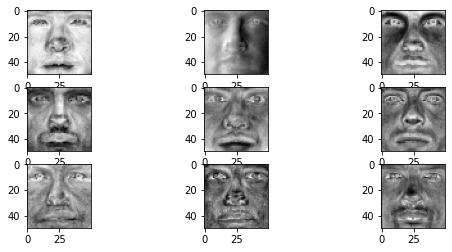

In [152]:
plt.figure(figsize=(9, 4))
for i in range(0,len(pca_9.components_),1):
  plt.subplot(3, 3, i+1)
  plt.imshow(pca_9.components_[i].reshape(50, 50), cmap='binary_r')
plt.show()

IV - ΑΝΑΚΑΤΑΣΚΕΥΗ ΕΙΚΟΝΩΝ

In [153]:
projected9_1 = pca_9.inverse_transform(x1_test_pca_9)
projected9_2 = pca_9.inverse_transform(x2_test_pca_9)
projected9_3 = pca_9.inverse_transform(x3_test_pca_9)
projected9_4 = pca_9.inverse_transform(x4_test_pca_9)
projected9_5 = pca_9.inverse_transform(x5_test_pca_9)

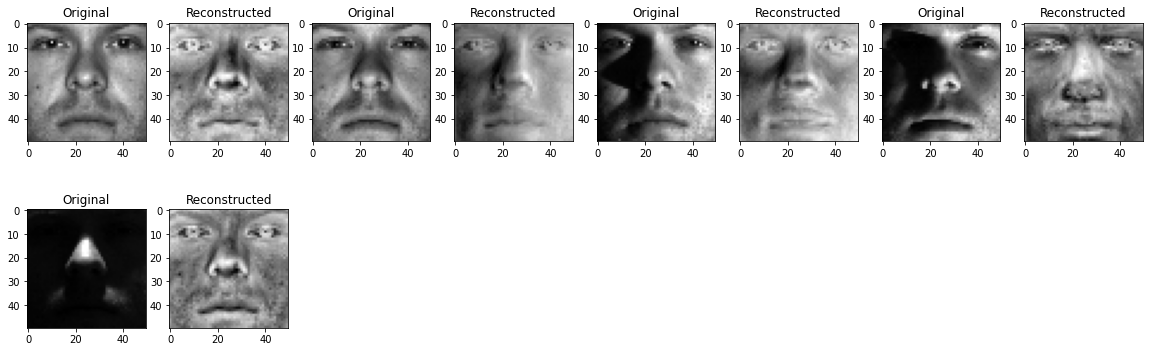

In [154]:
plt.figure(figsize=(20,20))
plt.subplot(6, 8, 1)
plt.title("Original")
plt.imshow(X1_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 3)
plt.title("Original")
plt.imshow(X2_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 5)
plt.title("Original")
plt.imshow(X3_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 7)
plt.title("Original")
plt.imshow(X4_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 9)
plt.title("Original")
plt.imshow(X5_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 10)
plt.title("Reconstructed")
plt.imshow(projected9_1[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 2)
plt.title("Reconstructed")
plt.imshow(projected9_2[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 4)
plt.title("Reconstructed")
plt.imshow(projected9_3[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 6)
plt.title("Reconstructed")
plt.imshow(projected9_4[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 8)
plt.title("Reconstructed")
plt.imshow(projected9_5[0].reshape(50, 50), cmap='binary_r')
plt.show()

In [155]:
projected30_1 = pca_30.inverse_transform(x1_test_pca_30)
projected30_2 = pca_30.inverse_transform(x2_test_pca_30)
projected30_3 = pca_30.inverse_transform(x3_test_pca_30)
projected30_4 = pca_30.inverse_transform(x4_test_pca_30)
projected30_5 = pca_30.inverse_transform(x5_test_pca_30)

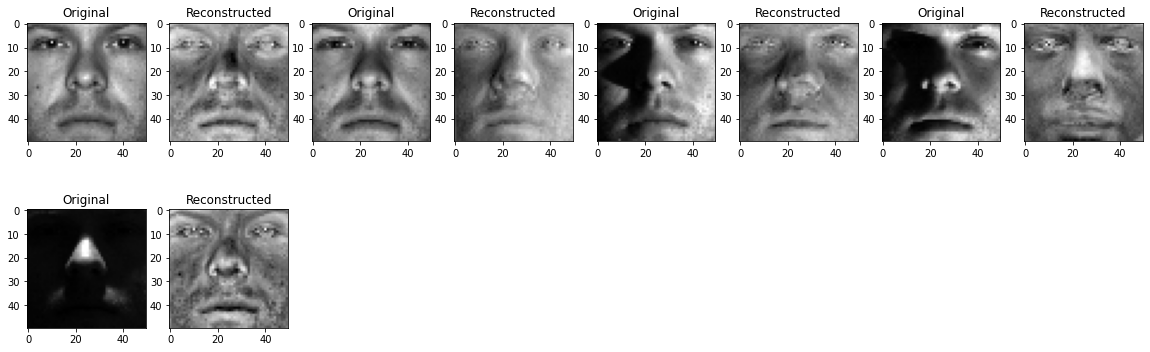

In [156]:
plt.figure(figsize=(20,20))
plt.subplot(6, 8, 1)
plt.title("Original")
plt.imshow(X1_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 3)
plt.title("Original")
plt.imshow(X2_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 5)
plt.title("Original")
plt.imshow(X3_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 7)
plt.title("Original")
plt.imshow(X4_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 9)
plt.title("Original")
plt.imshow(X5_test[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 10)
plt.title("Reconstructed")
plt.imshow(projected30_1[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 2)
plt.title("Reconstructed")
plt.imshow(projected30_2[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 4)
plt.title("Reconstructed")
plt.imshow(projected30_3[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 6)
plt.title("Reconstructed")
plt.imshow(projected30_4[0].reshape(50, 50), cmap='binary_r')
plt.subplot(6, 8, 8)
plt.title("Reconstructed")
plt.imshow(projected30_5[0].reshape(50, 50), cmap='binary_r')
plt.show()

<strong>Παρατηρήσεις:</strong>
    
Παρατηρήθηκε οτι η ποιότητα της ανακατεσκυής είναι καλύτερη όταν τα δεδομένα δεν γίνουν scale.

VI - SVD

In [157]:
svd = TruncatedSVD(n_components=9).fit(X_train_std)
X_train_svd = svd.transform(X_train_std)

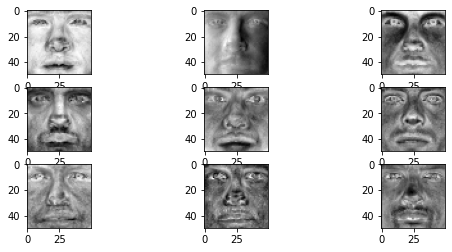

In [158]:
plt.figure(figsize=(9, 4))
for i in range(0,len(svd.components_),1):
  plt.subplot(3, 3, i+1)
  plt.imshow(svd.components_[i].reshape(50, 50), cmap='binary_r')
plt.show()

<strong>Παρατηρήσεις:</strong>

Τα singular vectors είναι ίδια με τα ιδιοδιανύσματα εαν τα δεδομένα γίνουν scale